In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [3]:
def real_func(x):
    return np.sin(2 * np.pi * x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    return fit_func(p, x) - y;

In [4]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [9]:
def fitting(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    print(p_init)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

[0.71021765]
Fitting Parameters: [0.00651147]


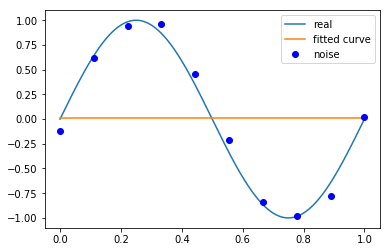

In [10]:
p_lsq_0 = fitting(M=0)

[0.6863443  0.64949791]
Fitting Parameters: [-1.32515988  0.66909141]


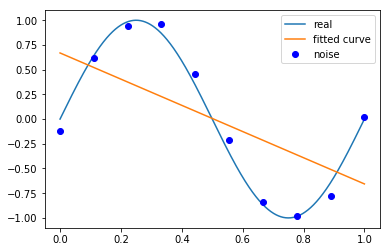

In [11]:
p_lsq_1 = fitting(M=1)

[0.71925293 0.77143736 0.3573642 ]
Fitting Parameters: [-0.66513716 -0.66002271  0.57055256]


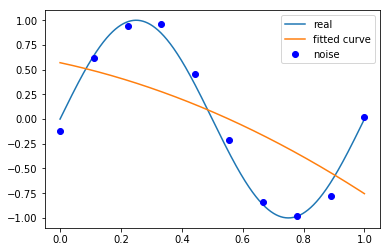

In [12]:
p_lsq_2 = fitting(M=2)

[0.78972939 0.57068178 0.12899343 0.57635318]
Fitting Parameters: [ 22.19215213 -33.95336543  11.97032568  -0.19658357]


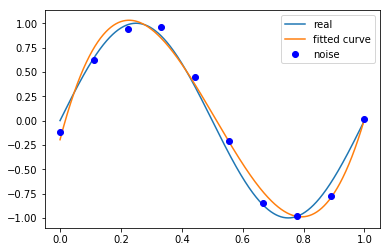

In [13]:
p_lsq_3 = fitting(M=3)

[0.5860671  0.69628432 0.67435377 0.7275631  0.52606893]
Fitting Parameters: [  6.84499477   8.50216252 -25.41824838  10.28020347  -0.15151365]


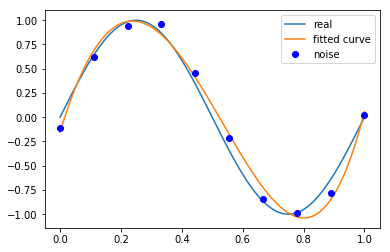

In [14]:
p_lsq_4 = fitting(M=4)

[0.2899853  0.57004972 0.05107621 0.15399196 0.84748123 0.65179988]
Fitting Parameters: [-40.11339277 107.12847843 -78.98795683   5.53344568   6.56701901
  -0.11075421]


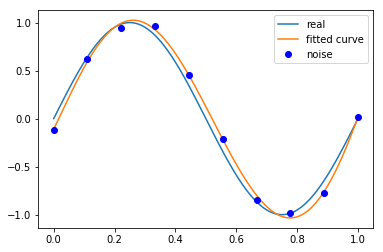

In [15]:
p_lsq_5 = fitting(M=5)

[0.44371403 0.34105341 0.41038347 0.64720166 0.67834392 0.11038555
 0.35551405]
Fitting Parameters: [ -7.74880727 -16.86699406  80.99479456 -65.46456055   2.39146932
   6.82169145  -0.11170853]


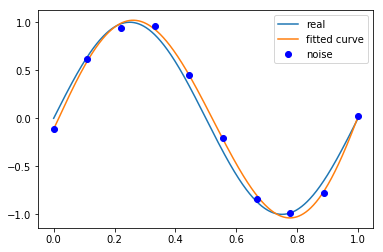

In [16]:
p_lsq_6 = fitting(M=6)

[0.62957709 0.9344412  0.1192781  0.21924951 0.99446171 0.94971427
 0.69775568 0.90088804 0.9301214 ]
Fitting Parameters: [ 1.41140840e+02 -1.72605656e+02 -4.57481111e+02  1.08311350e+03
 -8.35649193e+02  2.92347327e+02 -6.15746785e+01  1.08452275e+01
 -1.15948566e-01]


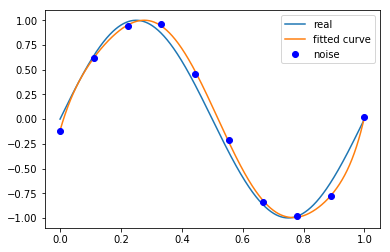

In [17]:
p_lsq_7 = fitting(M=8)

[0.71939595 0.79012589 0.98552696 0.93426912 0.42211525 0.98723967
 0.15956498 0.78720642 0.99302228 0.29117162]
Fitting Parameters: [ 1.22318180e+04 -5.49019800e+04  1.03864229e+05 -1.07718674e+05
  6.65884584e+04 -2.48798163e+04  5.41044235e+03 -6.29785840e+02
  3.54449337e+01 -1.16184174e-01]


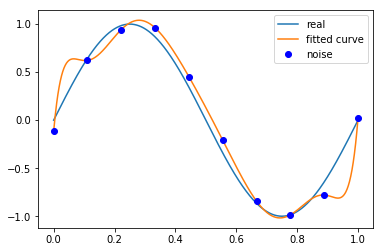

In [18]:
p_lsq_9 = fitting(M=9)

In [78]:
#为实际给出的函数
def cos_log(x):
    return np.cos(x)+np.log(x)

In [79]:
#采用多项式来拟合函数
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

In [80]:
#误差函数
def error(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [95]:
x_points = np.linspace(0.1, 10, 1000)
x = np.linspace(0.1, 10, 20)
y_ = cos_log(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [96]:
print(x)
print(y)

[ 0.1         0.62105263  1.14210526  1.66315789  2.18421053  2.70526316
  3.22631579  3.74736842  4.26842105  4.78947368  5.31052632  5.83157895
  6.35263158  6.87368421  7.39473684  7.91578947  8.43684211  8.95789474
  9.47894737 10.        ]
[-1.232347679899299, 0.412213522752673, 0.6165269719051749, 0.4189491009555964, 0.30445874879256896, 0.06879186983903722, 0.3631988735362712, 0.39354822942362533, 0.9138274575287793, 1.6728807410779807, 2.085204504053903, 2.6065955567707375, 2.8486708302601635, 2.6367138714311125, 2.495862246393043, 2.08847378505031, 1.7164487651699842, 1.308415875253273, 1.2210909508680006, 1.5012235274019006]


In [97]:
#scipy中的leastsq来最小化误差
#最小二乘法
def fitting(M=0):
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(error, p_init, args=(x, y))
    print(p_lsq[0])
    
    plt.plot(x_points, cos_log(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fited')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

[1.22203739]


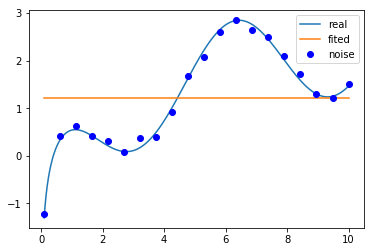

In [98]:
p_lsq_0 = fitting(M=0)

[ 0.24254436 -0.00281166]


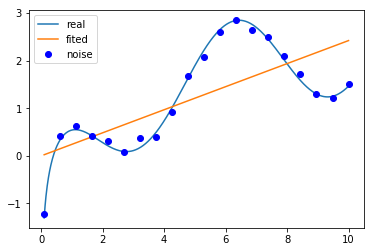

In [99]:
p_lsq_1 = fitting(M=1)

[-0.0590994   0.83944827 -0.97648976]


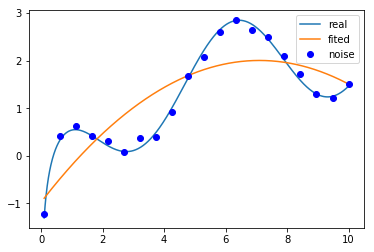

In [100]:
p_lsq_2 = fitting(M=2)

[-0.01385387  0.1507868   0.00388263 -0.32529857]


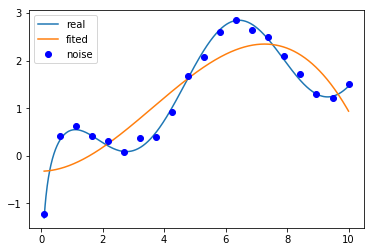

In [101]:
p_lsq_3 = fitting(M=3)

[-1.72628181e-04 -1.03667741e-02  1.28345651e-01  5.26782906e-02
 -3.46867545e-01]


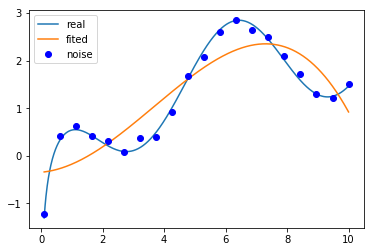

In [102]:
p_lsq_4 = fitting(M=4)

[ 3.41409573e-03 -8.63785466e-02  7.59125032e-01 -2.73558937e+00
  3.98960137e+00 -1.43873615e+00]


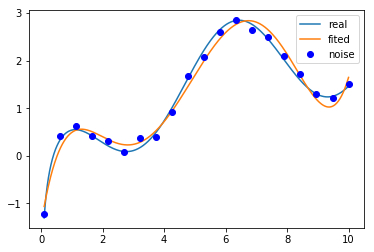

In [103]:
p_lsq_5 = fitting(M=5)

[-3.36211492e-04  1.36013039e-02 -2.02866329e-01  1.38018305e+00
 -4.26663492e+00  5.44417989e+00 -1.71174050e+00]


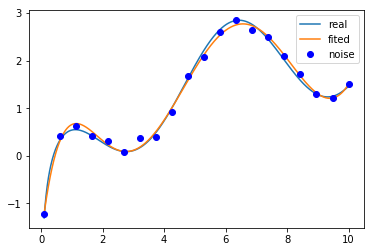

In [104]:
p_lsq_6 = fitting(M=6)

[-5.79468505e-06 -1.31367343e-04  1.07429152e-02 -1.82932724e-01
  1.30785895e+00 -4.13852997e+00  5.35442274e+00 -1.69950352e+00]


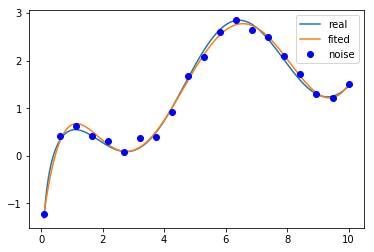

In [105]:
p_lsq_7 = fitting(M=7)

[-7.59759353e-06  3.01146824e-04 -5.18978631e-03  5.44244283e-02
 -3.93971566e-01  1.87062621e+00 -4.89720550e+00  5.76791512e+00
 -1.74358189e+00]


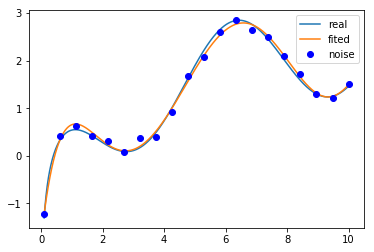

In [106]:
p_lsq_8 = fitting(M=8)

[ 8.50349770e-06 -3.94083122e-04  7.64903450e-03 -8.09520224e-02
  5.13529741e-01 -2.04932263e+00  5.29338895e+00 -8.57254490e+00
  7.40072631e+00 -1.88997217e+00]


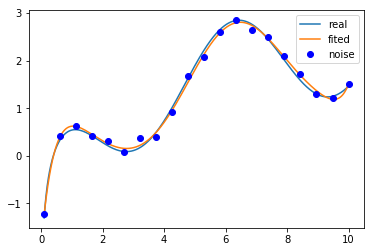

In [107]:
p_lsq_9 = fitting(M=9)

[-1.46666532e-06  8.25673605e-05 -1.98996430e-03  2.67920907e-02
 -2.20797893e-01  1.15297344e+00 -3.85968093e+00  8.31738400e+00
 -1.12587581e+01  8.41408964e+00 -1.97121461e+00]


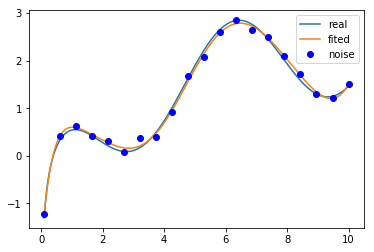

In [108]:
p_lsq_10 = fitting(M=10)